<div style="text-align: center;">
    <h1>Portfolio Optimization Using the Mean-Variance Framework</h1>
</div>

## Introduction



Building the best possible investment portfolio is a fundamental goal for investors in the world of finance. During the portfolio optimization process, each asset combination is carefully chosen to optimize predicted return while lowering associated risk. Investors can strive to obtain the best possible trade-off between risk and return by diversifying their investments over a variety of assets.

The `mean-variance` framework is one of the most popular models for portfolio optimization. The predicted returns and the covariance matrix of asset returns are taken into account in this framework to give a systematic method for allocating investments.

In this `Python` notebook, we will explore the concept of portfolio optimization using the mean-variance framework and implement it in a practical setting. We will leverage the power of `Python`'s scientific libraries, such as `NumPy`, `pandas`, and `matplotlib`, to perform the necessary calculations and visualize the results.

The notebook will guide you through the following key steps:

1. `Data Preparation and preprocessing`: We will start by gathering historical price data for a set of assets and calculating the corresponding returns. This data will serve as the foundation for our portfolio optimization process.

2. `Mean and Covariance Estimation`: We will calculate the mean returns and covariance matrix of the asset returns. These statistics are crucial inputs for the mean-variance optimization model.

3. `Portfolio Optimization`: Using the estimated mean returns and covariance matrix, we will formulate the optimization problem to find the optimal allocation of assets. We will define the objective function, constraints, and optimization algorithm to solve for the optimal portfolio weights.

4. `Evaluation and Analysis`: We will evaluate the performance of the optimized portfolio by calculating its expected return and risk measures.

5. `Efficient Frontier`: We will plot the efficient frontier, which represents the set of optimal portfolios that offer the highest expected returns for a given level of risk. This visualization will aid in selecting an appropriate portfolio based on an investor's risk appetite.

By the end of this notebook, you will have a thorough understanding of the mean-variance portfolio optimization framework and its useful Python implementation . With this information, you'll be better equipped to build diverse portfolios, make wise investment choices, and negotiate the confusing world of financial markets.

So let's dive in the fascinating world of portfolio optimization and discover how to maximize risk-adjusted returns!



## 1. Data Preparation and preprocessing


### 1.1 Data preparation

In [367]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from IPython.display import display

# Generate random prices for three stocks
np.random.seed(42)
stock1_prices = 100*np.random.rand(16)
stock2_prices = 100*np.random.rand(16)
stock3_prices = 100*np.random.rand(16)

# Create a DataFrame to store the prices
prices = pd.DataFrame({
    'Stock1': stock1_prices,
    'Stock2': stock2_prices,
    'Stock3': stock3_prices
})

# Display the prices
display(prices)

,Stock1,Stock2,Stock3
0,37.454012,30.424224,6.505159
1,95.071431,52.475643,94.888554
2,73.199394,43.194502,96.563203
3,59.865848,29.122914,80.839735
4,15.601864,61.185289,30.461377
5,15.599452,13.949386,9.767211
6,5.808361,29.214465,68.423303
7,86.617615,36.636184,44.015249
8,60.111501,45.606998,12.203823
9,70.807258,78.517596,49.517691


### 1.2. Data preprocessing using the logarithmic transformation

The preprocessing step involves calculating the log returns of the historical prices. Mathematically, this is done by taking the natural logarithm of the price ratios between consecutive time periods. The formula for calculating logarithmic returns is as follows:

\begin{align*}
\text{Logarithmic Return(t)} = ln(\frac{\text{Price(t)}}{\text{Price(t-1)}})
\end{align*}

In the given code snippet, the variable "prices" represents the historical price data. By applying the logarithm to the ratio of prices between consecutive time periods, we obtain the log returns.

Log returns are preferred in financial analysis for several reasons:

1. **`Normalization`**: Logarithmic returns help normalize the data by transforming absolute price changes into relative changes. This normalization can facilitate the comparison of returns across different assets or time periods.

2. **`Additivity`**: Logarithmic returns have the property of additivity. When calculating the returns over multiple time periods, adding individual log returns yields the total log return for the combined period. This additivity simplifies subsequent calculations.

3. **`Statistical Properties`**: Logarithmic returns tend to have more desirable statistical properties compared to simple returns. For example, log returns often exhibit a more symmetric distribution and can be closer to normality, which is beneficial for certain mathematical models and statistical analyses.

In [368]:
# Calculate log returns
returns = np.log(prices / prices.shift(1))
print("The returns after the log transformation: ")
returns = returns.dropna()
display(returns)

The returns after the log transformation: 


,Stock1,Stock2,Stock3
1,0.931515,0.545110,2.680107
2,-0.261441,-0.194636,0.017495
3,-0.201081,-0.394188,-0.177729
4,-1.344716,0.742382,-0.976009
5,-0.000155,-1.478471,-1.137429
6,-0.987937,0.739228,1.946682
7,2.702205,0.226372,-0.441177
8,-0.365302,0.219025,-1.282787
9,0.163760,0.543262,1.400581
10,-3.538009,-1.369223,-2.667192


## 2. Mean and covariance estimation

### 2.1. Before the Preprocessing

In [369]:
# Calculate mean and covariance of prices
mu = prices.mean()  
cov = prices.cov() 
print ("The mean vector:")
display(pd.DataFrame({"Mean":mu}))
print("The covariance matrix: ")
display(pd.DataFrame(cov))
mu = np.array(mu)
cov = np.array(cov)

The mean vector:


,Mean
Stock1,47.511706
Stock2,39.588214
Stock3,47.679021


The covariance matrix: 


,Stock1,Stock2,Stock3
Stock1,1158.318388,348.792969,527.556760
Stock2,348.792969,416.841717,61.623588
Stock3,527.556760,61.623588,1052.813346


### 2.2. After the Preprocessing

In [370]:
# Calculate mean and covariance of returns
log_mu = returns.mean()
log_cov = returns.cov()
print ("The mean vector after the log transformation:")
display(pd.DataFrame({"Mean":log_mu}))
print("The covariance matrix after the log transformation:")
display(pd.DataFrame(log_cov))
log_mu = np.array(log_mu)
log_cov = np.array(log_cov)

The mean vector after the log transformation:


,Mean
Stock1,-0.047600
Stock2,-0.038596
Stock3,0.138585


The covariance matrix after the log transformation:


,Stock1,Stock2,Stock3
Stock1,2.890247,0.788438,1.614644
Stock2,0.788438,1.545810,0.426721
Stock3,1.614644,0.426721,2.706962


## 3. Portfolio Optimization


### 3.1. Defining the objective function for portfolio optimization

The objective function in portfolio optimization, $F(w)$, combines different components to find an optimal allocation of assets. It can be mathematically represented as:

\begin{align*} 
\text{Objective Function} = \text{Portfolio Risk} + \text{Penalty}
\end{align*}

1. **`Portfolio Risk`**: The portfolio risk measures the uncertainty or volatility of the portfolio's returns. It is typically represented by the standard deviation of the portfolio returns. The portfolio risk can be computed using the following formula:

   \begin{align*}
   \text{Portfolio Risk} = \sqrt{w^T \cdot C_{log} \cdot w}
   \end{align*}

   Here, $w$ represents the vector of portfolio weights, and $C_{log}$ is the logarithmic covariance matrix of asset returns.

2. **`Penalty`**: The penalty term is included to enforce the desired target return in the optimization process. The penalty encourages the portfolio to approach the target return by penalizing deviations from it. Mathematically, the penalty term can be expressed as:

   \begin{align*}
   \text{Penalty} = P \cdot \left|\bar V - (1 + T) V\right|
   \end{align*}

   Here, **$\bar V$** represents the expected return of the portfolio, **$P$** is a parameter that controls the strength of the penalty, **$T$** is the desired target return, and **$V$** is the value of the portfolio.
   
   **Note**:
   
   \begin{align*}
   \bar V = w^T \cdot \mu_{log}\\ \text{ and } V = w^T \cdot \Gamma
   \end{align*}
   where $\mu_{log}$ denotes the logarithmic expected returns and $\Gamma$ is the return in the last period.
   

By summing the portfolio risk and the penalty term, the objective function aims to find the optimal weights that minimize the risk of the portfolio while considering the deviation from the target return.

The total formula of the objective function, combining the portfolio risk and the penalty term, is as follows:

\begin{align*}
F(w) = \sqrt{w^T \cdot C_{log} \cdot w} + P \cdot \left| \bar V - (1 + T) \cdot V \right|
     = \sqrt{w^T \cdot C_{log} \cdot w} + P \cdot \left|w^T \cdot (\mu_{log} - (1 + T) \cdot \Gamma)\right|
\end{align*}


It's important to note that the specific formulas and mathematical representations may vary depending on the optimization approach or methodology used. However, the key idea remains consistent: to balance risk and return while incorporating a penalty for deviations from the desired target return.


In [371]:
# Define objective function for portfolio optimization
def objective(weights, log_mu, log_cov, target_return,penalty_weight):
    portfolio_return = log_mu @ weights
    portfolio_risk = np.sqrt(np.dot(weights.T, np.dot(log_cov, weights)))
    portfolio_value = np.dot(weights, returns.iloc[-1].values.T)
    penalty = penalty_weight * np.abs(portfolio_return - (1 + target_return)*portfolio_value)
    return portfolio_risk + penalty

### 3.2. Setting the bounds, constraints, target return, and penalty weight for the problem

Here in this cell, we define the parameters for this specific problem. Here's a brief explanation of the role of each parameter:

1. **`Constraints`**: The constraints parameter is used to define the constraints for portfolio optimization. In this case, the constraint is defined as the sum of all weights assigned to assets in the portfolio equaling 1. This constraint ensures that the portfolio fully invests its resources, meaning that all weights sum up to 1, representing a fully invested portfolio.

2. **`Bounds`**: The bounds parameter is used to set the upper and lower bounds for the weights assigned to assets in the portfolio. In this case, the bounds are set between 0 and 1 for each asset. These bounds indicate that the weight for each asset can range from 0% to 100% of the total portfolio allocation, ensuring that the portfolio is long-only (no short-selling) and fully invested.

3. **`Target Return`**: The target return parameter is used to define the desired expected return for the portfolio optimization. In this case, a target return of 0.1 (or 10%) is set. The portfolio optimization algorithm will try to find the optimal set of weights that achieves this target return while minimizing the portfolio risk.

4. **`Penalty Weight`**: The penalty weight parameter is a positive reel number used to determine the relative importance of the penalty term in the objective function for portfolio optimization. The penalty term is added to the objective function to control the deviation of the portfolio's return from the target return. A higher penalty weight places more emphasis on achieving the target return precisely, while a lower penalty weight allows for more flexibility in optimizing the risk-return trade-off.

I invite you to mess around with the last two parameters to gain an insight on their influence on our model.

In [372]:
# Define constraints for portfolio optimization
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

# Define bounds for portfolio optimization
bounds = tuple((0, 1) for i in range(len(log_mu)))

# Define target return for portfolio optimization
target_return = 0.10

# Define relative importance of penalty for portfolio optimization
penalty_weight = 0.10

### 3.3. Optimizing the weights

In [373]:
# Optimize portfolio weights
result = minimize(objective, x0 = np.ones(len(log_mu))/len(log_mu), args=(log_mu, log_cov, target_return,penalty_weight), method='SLSQP', bounds=bounds, constraints=constraints)
# Print optimized portfolio weights
print(f'The optimal portfolio weights are : {result.x}')

The optimal portfolio weights are : [0.09216173 0.5742721  0.33356617]


## 4. Evaluation and Analysis

The following analysis presents the evaluation of a portfolio optimization process, along with the corresponding results:

In [374]:
# Calculate the value of the portfolio
portfolio_value = np.dot(result.x, prices.iloc[-1].values.T)
print(f"The value of the optimal portfolio: {portfolio_value:0.3f}$")

# Calculate portfolio return and risk
portfolio_return = np.sum(mu @ result.x)
portfolio_risk = np.sqrt(np.dot(result.x.T, np.dot(cov, result.x)))
print(f"The expected return: {portfolio_return:0.3f}$")
print(f"The risk associated to this portfolio: {portfolio_risk:0.3f}$")

# The return percentage
print(f"This portfolio generates {(portfolio_return - portfolio_value) * 100 / portfolio_value :0.2f}% in returns of its value.")

The value of the optimal portfolio: 28.831$
The expected return: 43.017$
The risk associated to this portfolio: 18.905$
This portfolio generates 49.21% in returns of its value.



The following analysis presents the evaluation of a portfolio optimization process, along with the corresponding results, based on a target return of 10%:

1. **`Portfolio Value`**: The optimal portfolio has a value of $28.831. This value represents the total worth of the portfolio, considering the weights assigned to each asset.

2. **`Expected Return`**: The expected return of the portfolio is 43.017%. This indicates the anticipated average gain or loss of the portfolio over a specific period. A higher expected return suggests the potential for higher profitability.

3. **`Portfolio Risk`**: The risk associated with the portfolio is measured by the portfolio risk metric, which is 18.905%. This value represents the standard deviation or volatility of the portfolio's returns. A lower portfolio risk implies a more stable and less volatile investment.

4. **`Return Percentage`**: The portfolio generates a return of 49.21% relative to its value. This metric represents the percentage gain or loss in value that the portfolio has generated. A positive return percentage indicates a profit, while a negative value implies a loss.

Considering the target return of 5%, it is important to note that the expected return of the optimized portfolio exceeds the target. This suggests that the portfolio has the potential to generate higher returns than the desired 5%.

To meet the target return, you may need to adjust the portfolio weights or consider alternative investment options. It's crucial to strike a balance between risk and return based on your individual risk tolerance and investment objectives.



## 5. The efficient frontier

The `efficient frontier` is a fundamental concept in portfolio optimization, which aims to find the optimal trade-off between risk and return. It represents a set of portfolios that offer the highest expected return for a given level of risk or the lowest risk for a given expected return. Mathematically, the efficient frontier can be expressed as follows:

Let $\boldsymbol{\mu_{log}}$ be the vector of expected logarithmic returns for the assets in the portfolio, and $\boldsymbol{C_{log}}$ be the logarithmic covariance matrix of asset returns. The efficient frontier can be obtained by solving the following optimization problem:


\begin{align*}
\text{Minimize} & \quad \boldsymbol{w}^T\boldsymbol{C_{log}}\boldsymbol{w} \\
\text{Subject to} & \quad \boldsymbol{w}^T\boldsymbol{\mu_{log}} = \bar{\mu _{log}} \\
& \quad \boldsymbol{w}^T\boldsymbol{1} = 1 \\
\end{align*}


where $\boldsymbol{w}$ represents the weights assigned to each asset in the portfolio, $\boldsymbol{1}$ is a vector of ones, and $\bar{\mu _{log}}$ is the target expected return.

Note that the [$\boldsymbol{w}^T\boldsymbol{1} = 1$] is equivalent to saying that [the sum of all weights is equal to 1].

In the code cell provided, we plot the efficient frontier by varying the expected return, $\bar{\mu _{log}}$, and solving the optimization problem to minimize portfolio risk, $\boldsymbol{w}^T\boldsymbol{C}\boldsymbol{w}$. The resulting plot illustrates the risk-return trade-off, with the x-axis representing risk (standard deviation) and the y-axis representing return (expected portfolio return). By examining the efficient frontier, investors can identify the optimal portfolios that suit their risk preferences and investment objectives.


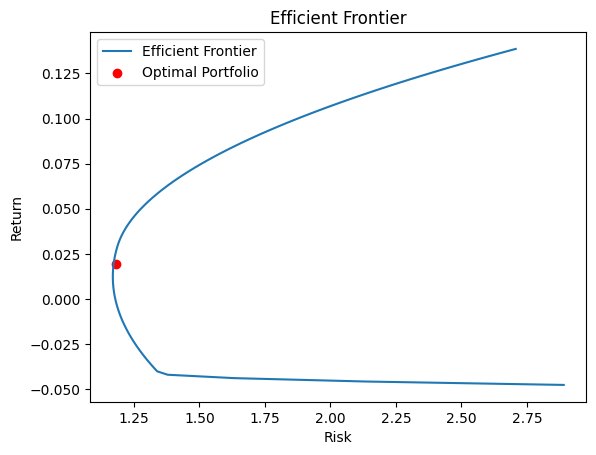

In [375]:
# Plot efficient frontier
def efficient_frontier_objective(weights, log_cov):
    return np.dot(weights.T, np.dot(log_cov, weights))  
 
mus = np.linspace(log_mu.min(), log_mu.max(), 100)
risks = []
for m in mus:
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1},
                   {'type': 'eq', 'fun': lambda x, m=m: np.sum(log_mu * x) - m})
    efficient_frontier_result = minimize(efficient_frontier_objective, x0=np.ones(len(log_mu))/len(log_mu), args=(log_cov,), method='SLSQP', bounds=bounds, constraints=constraints)
    risks.append(efficient_frontier_result.fun)
plt.plot(risks, mus, label='Efficient Frontier')
plt.scatter(np.dot(result.x.T, np.dot(log_cov, result.x)),np.sum(log_mu @ result.x),color='r', label='Optimal Portfolio')
plt.xlabel('Risk')
plt.ylabel('Return')
plt.title('Efficient Frontier')
plt.legend()
plt.show()

## 6. The influence of the penalty weight

The penalty weight in portfolio optimization determines the strength of the penalty imposed on deviations from the target return. By varying the penalty weight, we can observe different impacts on the optimal portfolios and the efficient frontier.

In the given code, the penalty weights are defined as `0`, `0.5`, & `10`, and the optimization is performed for each penalty weight. Here's an interpretation of the impact of different penalty weights:

1. **`Penalty Weight = 0`**: When the penalty weight is set to 0, there is no penalty imposed on deviations from the target return. This means that the optimization focuses solely on minimizing the portfolio risk while disregarding the target return. The resulting optimal portfolios will lie on the efficient frontier without any consideration for the desired return.

2. **`Penalty Weight = 0.5`**: With a non-zero penalty weight, deviations from the target return are taken into account. A penalty weight of 0.5 indicates a moderate penalty on the deviations. As a result, the optimization will try to balance between minimizing the portfolio risk and approaching the target return. The optimal portfolios will be influenced by both risk and the desired return.

3. **`Penalty Weight = 10`**: A high penalty weight of 10 implies a strong penalty on deviations from the target return. This indicates a greater emphasis on achieving the desired return at the expense of increased risk. The optimization will prioritize portfolios that closely match the target return, potentially resulting in higher risk levels compared to the previous cases.

By plotting the optimal portfolios for different penalty weights along with the efficient frontier, you can visually observe how the penalty weight affects the distribution of optimal portfolios in terms of risk and return.

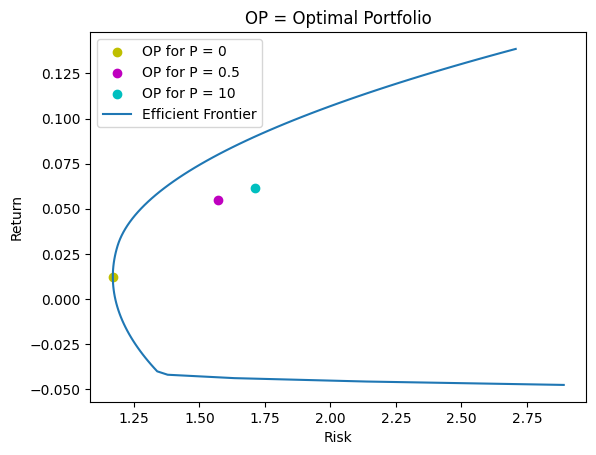

In [376]:
# Define penalty weights
penalty_weights = [0,0.5,10]
# Define constraints for portfolio optimization
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
# Colors
color = ['y','m','c']
results=[]
for penalty_weight in penalty_weights:
    # Optimize portfolio weights
    result = minimize(objective, x0 = np.ones(len(log_mu))/len(log_mu), args=(log_mu, log_cov, target_return,penalty_weight), method='SLSQP', bounds=bounds, constraints=constraints)
    results.append(result)
# Plot efficient frontier & optimal portfolios
for i,result in enumerate(results):
    plt.scatter(np.dot(result.x.T, np.dot(log_cov, result.x)),np.sum(log_mu @ result.x), label=f'OP for P = {penalty_weights[i]}',color=color[i])
plt.plot(risks, mus, label='Efficient Frontier')
plt.xlabel('Risk')
plt.ylabel('Return')
plt.title('OP = Optimal Portfolio')
plt.legend()
plt.show()

## Conclusion

In our Python notebook, we investigated portfolio optimization using the mean-variance framework. We built the procedure for creating an ideal investment portfolio using Python's scientific libraries.

We learned how to maximize returns while reducing risk through data preparation, mean and covariance estimation, and portfolio optimization. The efficient frontier plot helped in portfolio selection based on risk preferences by visualizing the risk-return trade-off.

This notebook offers a framework for portfolio optimization, but real-world situations might call for other factors to be taken into account. It is vital to continuously monitor and make modifications.

With these skills, you can explore advanced techniques, expand analysis to different assets or strategies, and make informed decisions to optimize portfolios.

Happy portfolio optimization, and may your investments flourish with optimal risk-adjusted returns!